In [2]:
import numpy as np 
import pandas as pd 
import os
from PIL import Image
import requests
from sentence_transformers import SentenceTransformer, util
from IPython.display import display
from IPython.display import Image as IPImage
from pyspark.sql import SparkSession


In [9]:
# Create a SparkSession
spark = SparkSession.builder.appName("doogle").getOrCreate()

# Define paths to your CSV files
image_embeddings_path = "image_embeddings.csv"
text_embeddings_path = "text_embeddings.csv"
image_url_path = "caption.csv"
image_embeddings_df = spark.read.csv(image_embeddings_path, header=False, inferSchema=True)
text_embeddings_df = spark.read.csv(text_embeddings_path, header=False, inferSchema=True)
image_url_df = spark.read.csv(image_url_path, header=True, inferSchema=True)

In [10]:
image_embeddings_df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------

In [12]:

# joined_df = image_embeddings_df.join(image_url_df, on="image", how="inner") \
#            .join(text_embeddings_df, on="image_id", how="inner")

# Explore the joined DataFrame
# joined_df.show()

# Example usage: Find images with similar embeddings (replace with actual columns)
# similar_images_df = joined_df.select("image_url", "image_embedding") \
#                              .rdd.filter(lambda row: some_similarity_function(row[0], row[1])) \
#                              .toDF(["image_url", "similar_image_embedding"])

# similar_images_df.show()

# Stop the SparkSession
spark.stop()


In [2]:
model = SentenceTransformer('clip')
text_embedder = SentenceTransformer('miniLM')
flickr = pd.read_csv("caption.csv")
flickr_text_embeddings = pd.read_csv("text_embeddings.csv", header=None).to_numpy()
flickr_image_embeddings = pd.read_csv("image_embeddings.csv",header=None).to_numpy()
flickr_text_embeddings = flickr_text_embeddings.astype(np.float32)
flickr_image_embeddings = flickr_image_embeddings.astype(np.float32)

torch.float32
Query:


'a human'

{'corpus_id': 926, 'score': 0.5604469180107117}
207584893_63e73c5c28.jpg


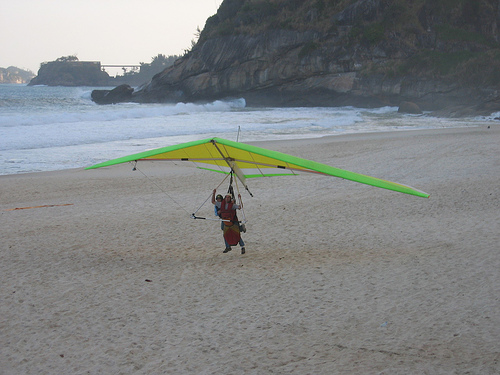

'A person in a hang-glider .'

{'corpus_id': 4182, 'score': 0.5446885824203491}
3138399980_d6ab8b2272.jpg


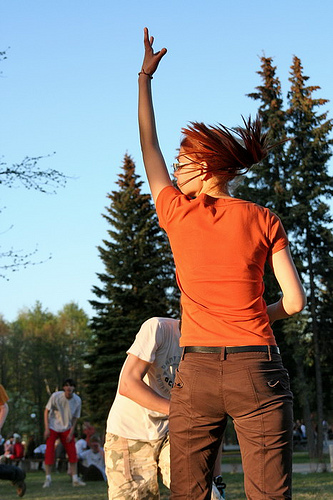

'A person in an orange shirt reaching up .'

{'corpus_id': 7128, 'score': 0.5368920564651489}
391020801_aaaae1e42b.jpg


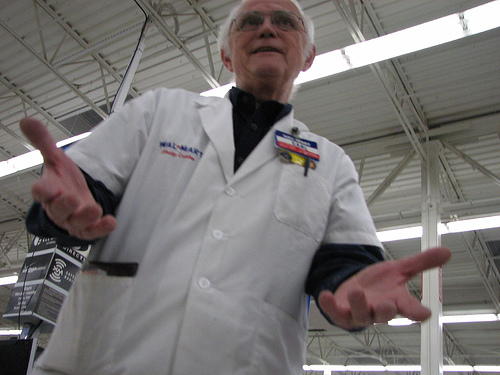

'A man gesticulates .'

{'corpus_id': 6646, 'score': 0.5140705108642578}
3638459638_ec74e3ff89.jpg


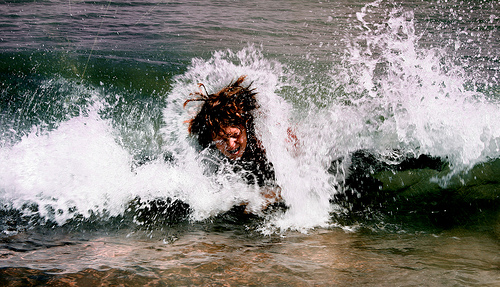

'A person is being swept to the ground by waves .'

{'corpus_id': 2466, 'score': 0.5066720247268677}
262446581_06ef7d9445.jpg


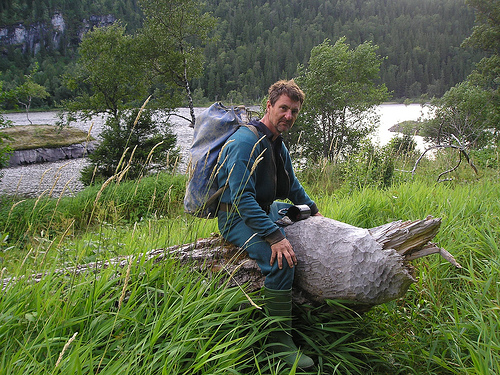

'A guy on a log .'

In [5]:
img_names = flickr['image'].to_numpy()
cap = flickr['caption'].to_numpy()
img_folder = "Images"

def search_by_text(query, k=5):
    query_emb = text_embedder.encode([query], convert_to_tensor=True, show_progress_bar=False)
    print(query_emb.dtype)
    hits = util.semantic_search(query_emb, flickr_text_embeddings, top_k=k)[0]
    print("Query:")
    display(query)
    for hit in hits:
        print(hit)
        print(img_names[hit['corpus_id']])
        display(IPImage(os.path.join(img_folder, img_names[hit['corpus_id']]), width=200))
        display(cap[hit['corpus_id']])

search_by_text('a human')

In [ ]:
def search_by_image(img, k=5):
    query_emb = text_embedder.encode(img, convert_to_tensor=True, show_progress_bar=False)

    hits = util.semantic_search(query_emb, flickr_image_embeddings, top_k=k)[0]
    # print("Query:")
    # display(query)
    for hit in hits:
        print(hit)
        print(img_names[hit['corpus_id']])
        display(IPImage(os.path.join(img_folder, img_names[hit['corpus_id']]), width=200))